In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !pip install plotly.express

In [ ]:
import plotly.express as pex

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.0,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1


# **Part-1 EDA, ANALYSIS, ADVANCED MISSING VALUES IMPUTATION,AND NEXT LEVEL PRE PROCESSING **

In [ ]:
df['CPU'].value_counts()

Quad Core, 8 Threads               130
Hexa Core, 12 Threads              126
10 Cores (2P + 8E), 12 Threads     125
Octa Core, 16 Threads              102
12 Cores (4P + 8E), 16 Threads      83
Dual Core, 4 Threads                55
14 Cores (6P + 8E), 20 Threads      50
Hexa Core (2P + 4E), 8 Threads      44
Octa Core (4P + 4E), 12 Threads     43
Dual Core, 2 Threads                36
10 Cores (6P + 4E), 16 Threads      26
24 Cores (8P + 16E), 32 Threads     16
16 Cores (8P + 8E), 24 Threads      10
14 Cores (6P + 8E)                   9
5 Cores (1P + 4E), 6 Threads         7
Octa Core (4P + 4E)                  5
Quad Core, 4 Threads                 4
Octa Core, 8 Threads                 4
Octa Core                            3
10 Cores (8P + 2E)                   2
Quad Core                            2
12 Cores                             2
10 Cores, 12 Threads                 2
10 Cores                             2
24 Cores (8P + 16E)                  1
16 Cores, 32 Threads     

<Axes: xlabel='Ram', ylabel='price'>

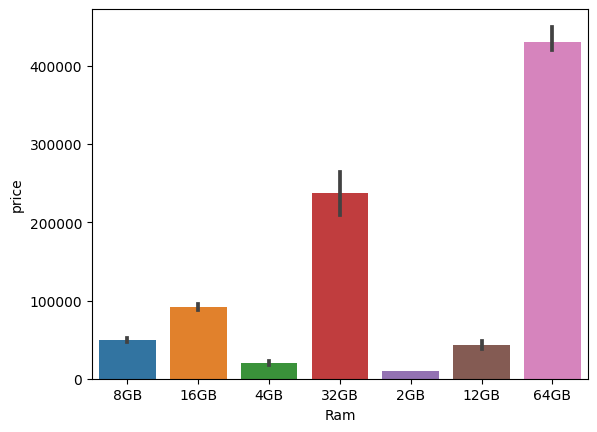

In [ ]:
sns.barplot(df,x='Ram', y='price')

<Axes: xlabel='ROM_type', ylabel='price'>

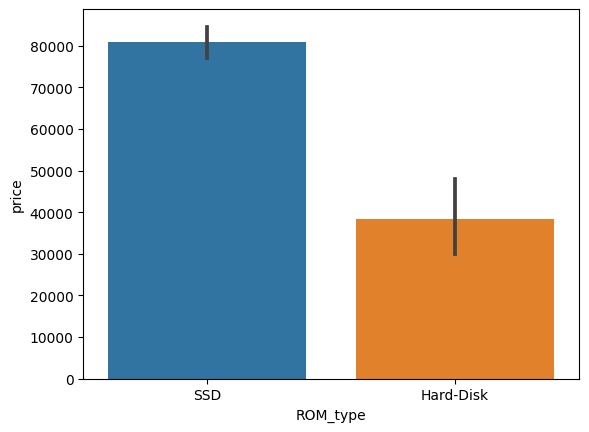

In [ ]:
sns.barplot(df,x='ROM_type',y='price')

<Axes: xlabel='brand', ylabel='price'>

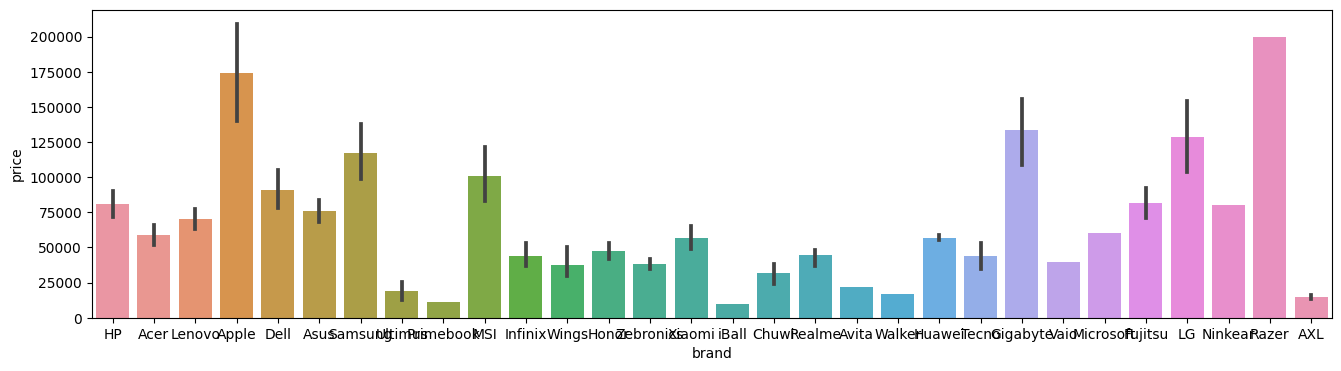

In [ ]:
plt.figure(figsize=(16,4))
sns.barplot(df,x='brand',y='price')

In [ ]:
# plt.figure(figsize=(16,9))
pex.bar(x=df['CPU'].value_counts().index,y=df['CPU'].value_counts().values,template='plotly_dark')

In [ ]:
pex.bar(df,x='CPU',color='processor')

In [ ]:
pex.histogram(df,x='spec_rating')

In [ ]:
fig = pex.scatter(df,x='resolution_width',y='resolution_height',color='OS',template='plotly_dark')
fig.show()

In [ ]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.0,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1


In [ ]:
df['Ram'].value_counts()

16GB    456
8GB     369
32GB     40
4GB      22
64GB      3
12GB      2
2GB       1
Name: Ram, dtype: int64

In [ ]:
list(df['processor'].value_counts().index)

['12th Gen Intel Core i5 1235U',
 '13th Gen Intel Core i5 1335U',
 '12th Gen Intel Core i3 1215U',
 '11th Gen Intel Core i3 1115G4',
 '12th Gen Intel Core i5 12450H',
 '13th Gen Intel Core i7 1360P',
 '7th Gen AMD Ryzen 3 7320U',
 '12th Gen Intel Core i5 12500H',
 '7th Gen AMD Ryzen 5 7520U',
 '13th Gen Intel Core i7 13700H',
 '7th Gen AMD Ryzen 5 7530U',
 '7th Gen AMD Ryzen 7 7840HS',
 '11th Gen Intel Core i5 1135G7',
 '5th Gen AMD Ryzen 5 5500U',
 '12th Gen Intel Core i5 1240P',
 '13th Gen Intel Core i7 1355U',
 '12th Gen Intel Core i7 12650H',
 '13th Gen Intel Core i9 13900H',
 '13th Gen Intel Core i5 1340P',
 '5th Gen AMD Ryzen 5 5600H',
 '11th Gen Intel Core i5 1155G7',
 '13th Gen Intel Core i5 13500H',
 '7th Gen AMD Ryzen 5 7535HS',
 '7th Gen AMD Ryzen 7 7730U',
 '12th Gen Intel Core i7 12700H',
 '5th Gen AMD Ryzen 7 5800H',
 '11th Gen Intel Core i5 11260H',
 '13th Gen Intel Core i7 13700HX',
 '13th Gen Intel Core i7 13650HX',
 '12th Gen Intel Core i7 1255U',
 'Intel Celeron N450

In [ ]:
import re

def parse_processor_name(processor_name):
    # Define regular expressions for extracting information
    regexes = [
        re.compile(r'(\d+)(?:th|rd|st) Gen (Intel|AMD) (Core|i\d+|Celeron|Pentium|Atom|Ryzen|Athlon) ?(\w*)'),
        re.compile(r'(Apple) (M1|M2(?: Pro)?(?: Max)?)'),
        re.compile(r'(Intel) (Celeron|Pentium|Atom) (\w+)'),
        re.compile(r'(\d+)(?:th|rd|st) Gen (Intel) (Celeron) (\w+)'),
        re.compile(r'(\d+)(?:th|rd|st) Gen (Intel) (Pentium) (\w+)'),
        re.compile(r'(\d+)(?:th|rd|st) Gen (Intel) (Core) (i\d+) (\w*)'),
        re.compile(r'(\d+)(?:th|rd|st) Gen (Intel) (Core) (i\d+)'),
    ]

    # Match the regular expressions against the processor name
    for regex in regexes:
        match = regex.match(processor_name)
        if match:
            groups = match.groups()
            if groups[0] == 'Apple':
                return {'generation':'1','company': groups[0],'model_type': 'M1', 'version': groups[1]}
            elif groups[0] == 'Intel':
                if groups[2] in ['Celeron', 'Pentium', 'Atom']:
                    return {'generation': groups[1], 'company': groups[0], 'model_type': groups[2], 'version': groups[3]}
                elif groups[2] == 'Core':
                    return {'generation': groups[1], 'company': groups[0], 'model_type': f'{groups[2]} {groups[4]}', 'version': groups[5]}
                else:
                    return None
            else:
                return {'generation': groups[0], 'company': groups[1], 'model_type': groups[2], 'version': groups[3]}

    return None


In [ ]:
processors = list(df['processor'])
new = []
for processor in processors:
  print(processor)
  value = parse_processor_name(processor)
  new.append(value)


5th Gen AMD Ryzen 5 5600H
12th Gen Intel Core i3 1215U
11th Gen Intel Core i3 1115G4
12th Gen Intel Core i5 1240P
Apple M1
12th Gen Intel Core i5 1240P
12th Gen Intel Core i3 1215U
13th Gen Intel Core i5 13420H
12th Gen Intel Core i5 12500H
12th Gen Intel Core i5 1240P
12th Gen Intel Core i7 1255U
Intel Celeron  N4020
12th Gen Intel Core i5 12500H
MediaTek MTK8788
7th Gen AMD Ryzen 3 7320U
11th Gen Intel Core i5 11400H 
11th Gen Intel Core i3 1115G4
13th Gen Intel Core i9 13900H
12th Gen Intel Core i5 12450H
11th Gen Intel Core i5 11300H
5th Gen AMD Ryzen 5 5600H
Apple M2
12th Gen Intel Core i5 12450H
11th Gen Intel Core i5 1135G7 
5th Gen AMD Ryzen 7  5800H
5th Gen AMD Ryzen 5 5500U
3rd Gen AMD Athlon 3050U
Intel Core i3 N305
12th Gen Intel Core i5 1240P
13th Gen Intel Core i7 1355U
6th Gen AMD Ryzen 5 6600H
13th Gen Intel Core i9 13900HX
5th Gen AMD Ryzen 5 5600H
5th Gen AMD Ryzen 5 5500U
12th Gen Intel Core i7 12650H
13th Gen Intel Core i5 1340P
11th Gen Intel Core i5 11400H 
12th G

In [ ]:
new.count(None)

61

In [ ]:
new[0]

{'generation': '5', 'company': 'AMD', 'model_type': 'Ryzen', 'version': '5'}

In [ ]:
processor_data = []
for obj in new:
  if obj is None:
    processor_data.append([None,None,None,None])
  else:
    processor_data.append([obj['company'],obj['generation'],obj['version'],obj['model_type']])

In [ ]:
len(processor_data)

893

In [ ]:
prodf = pd.DataFrame(processor_data,columns=['company','generation','version','model_type'])

In [ ]:
prodf

,company,generation,version,model_type
0,AMD,5,5,Ryzen
1,Intel,12,i3,Core
2,Intel,11,i3,Core
3,Intel,12,i5,Core
4,Apple,1,M1,M1
...,...,...,...,...
888,None,None,None,None
889,AMD,6,7,Ryzen
890,AMD,7,9,Ryzen
891,Intel,13,i7,Core


In [ ]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.0,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1


In [ ]:
list(df['GPU'].value_counts().index)

['Intel Iris Xe Graphics',
 'Intel UHD Graphics',
 'Intel Integrated UHD',
 'AMD Radeon AMD',
 'AMD Radeon Graphics',
 'Intel Integrated Iris Xe',
 '4GB NVIDIA GeForce RTX 3050',
 '8GB NVIDIA GeForce RTX 4060',
 '4GB NVIDIA GeForce RTX 2050',
 '6GB NVIDIA GeForce RTX 4050',
 '4GB NVIDIA GeForce GTX 1650',
 'Intel Integrated UHD Graphics',
 '6GB NVIDIA GeForce RTX 3050',
 'Integrated Intel Iris Xe Graphics',
 'AMD Radeon',
 'Intel Iris Xe',
 '8GB NVIDIA GeForce RTX 4070',
 'Intel Integrated',
 'Integrated Intel UHD Graphics',
 '6GB NVIDIA GeForce RTX 3060',
 '6GB NVIDIA Geforce RTX 4050',
 'Intel Integrated Intel UHD',
 'Intel Graphics',
 '16GB NVIDIA GeForce RTX 4090',
 'AMD Radeon Radeon Graphics',
 'Intel Integrated Intel Iris Xe Graphics',
 'Intel Integrated Integrated',
 '8GB NVIDIA GeForce RTX 3070 Ti',
 '2GB NVIDIA GeForce MX450',
 '4GB AMD Radeon RX 6500M Graphics',
 'Intel Iris Xe Graphics ',
 'AMD Radeon 610M Graphics',
 'Intel UHD Graphics ',
 '12GB NVIDIA GeForce RTX 4080',


In [ ]:
import re

def get_gpu_type(gpu_name):
    # Define regular expressions for extracting GPU type information
    regexes = [
        re.compile(r'(NVIDIA|AMD)\s*(Radeon)?'),
        re.compile(r'(Apple)\s*(Integrated Graphics)'),
        re.compile(r'(Intel)\s*(Iris Xe Graphics|UHD Graphics|HD Graphics|Graphics)?'),
        re.compile(r'(ARM)\s*(Mali G\d+)'),
    ]

    # Match the regular expressions against the GPU name
    for regex in regexes:
        match = regex.search(gpu_name)
        if match:
            groups = match.groups()
            gpu_type = groups[1] if len(groups) > 1 and groups[1] else groups[0] if groups[0] else None
            return gpu_type

    return None

In [ ]:
get_gpu_type('4GB AMD Radeon RX 6500M')

'Radeon'

In [ ]:
gpus = list(df['GPU'])
gpu_data_list = []
for gpu in gpus:
  # print(gpu)
  value = get_gpu_type(gpu)
  gpu_data_list.append(value)


In [ ]:
gpu_data_list.count(None)

24

In [ ]:
gpu_data_list

['Radeon',
 'UHD Graphics',
 'Iris Xe Graphics',
 'Intel',
 None,
 'Iris Xe Graphics',
 'UHD Graphics',
 'NVIDIA',
 'Intel',
 'Iris Xe Graphics',
 'Intel',
 'Intel',
 'NVIDIA',
 'Mali G72',
 'Radeon',
 'NVIDIA',
 'Intel',
 'Intel',
 'NVIDIA',
 'NVIDIA',
 'Radeon',
 None,
 'NVIDIA',
 'Iris Xe Graphics',
 'Radeon',
 'Radeon',
 'AMD',
 'Intel',
 'NVIDIA',
 'UHD Graphics',
 'NVIDIA',
 'NVIDIA',
 'Radeon',
 'AMD',
 'NVIDIA',
 'Intel',
 'NVIDIA',
 'Graphics',
 'Intel',
 'NVIDIA',
 'UHD Graphics',
 'NVIDIA',
 'Intel',
 'UHD Graphics',
 'NVIDIA',
 'NVIDIA',
 'Graphics',
 'Radeon',
 'NVIDIA',
 'NVIDIA',
 'Intel',
 'Radeon',
 'UHD Graphics',
 'Radeon',
 'NVIDIA',
 'Intel',
 'Radeon',
 'Iris Xe Graphics',
 'NVIDIA',
 'NVIDIA',
 'NVIDIA',
 'NVIDIA',
 'NVIDIA',
 'Iris Xe Graphics',
 'Intel',
 'Intel',
 'Intel',
 'NVIDIA',
 'Iris Xe Graphics',
 'NVIDIA',
 'NVIDIA',
 'Intel',
 'NVIDIA',
 'Radeon',
 'Radeon',
 'NVIDIA',
 'NVIDIA',
 'Intel',
 'Intel',
 'Intel',
 'NVIDIA',
 'NVIDIA',
 'Intel',
 'NVIDIA'

In [ ]:
df['gpu_type'] = gpu_data_list

In [ ]:
# gpu data is too complex and can't be handled easily. for that I am just taking brand name of the gpu as new column.

In [ ]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,gpu_type
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,Radeon
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,UHD Graphics
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,Iris Xe Graphics


In [ ]:
df['gpu_type'].value_counts()

NVIDIA              297
Intel               189
Radeon              167
Iris Xe Graphics    125
UHD Graphics         77
AMD                   6
Graphics              6
Mali G72              1
HD Graphics           1
Name: gpu_type, dtype: int64

<Axes: xlabel='gpu_type', ylabel='price'>

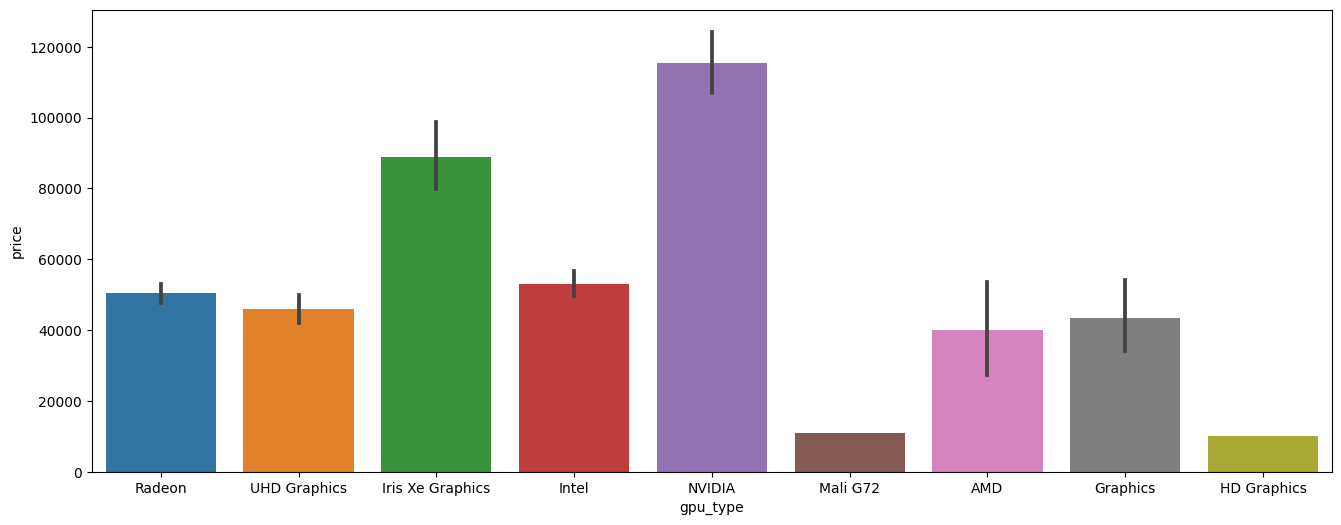

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(df,x='gpu_type',y='price')

In [ ]:
display_size_options = list(df['display_size'].value_counts())

In [ ]:
display_size_options

[464, 214, 112, 28, 21, 14, 7, 7, 5, 4, 4, 3, 2, 2, 2, 2, 1, 1]

In [ ]:
list(df['CPU'].value_counts().index)

['Quad Core, 8 Threads',
 'Hexa Core, 12 Threads',
 '10 Cores (2P + 8E), 12 Threads',
 'Octa Core, 16 Threads',
 '12 Cores (4P + 8E), 16 Threads',
 'Dual Core, 4 Threads',
 '14 Cores (6P + 8E), 20 Threads',
 'Hexa Core (2P + 4E), 8 Threads',
 'Octa Core (4P + 4E), 12 Threads',
 'Dual Core, 2 Threads',
 '10 Cores (6P + 4E), 16 Threads',
 '24 Cores (8P + 16E), 32 Threads',
 '16 Cores (8P + 8E), 24 Threads',
 '14 Cores (6P + 8E)',
 '5 Cores (1P + 4E), 6 Threads',
 'Octa Core (4P + 4E)',
 'Quad Core, 4 Threads',
 'Octa Core, 8 Threads',
 'Octa Core',
 '10 Cores (8P + 2E)',
 'Quad Core',
 '12 Cores',
 '10 Cores, 12 Threads',
 '10 Cores',
 '24 Cores (8P + 16E)',
 '16 Cores, 32 Threads',
 'Octa Core, 12 Threads',
 '14 Cores, 20 Threads',
 '20 Threads']

In [ ]:
pex.bar(df,x='CPU',y='price',template='plotly_dark')

In [ ]:
import re

def extract_cores_threads(cpu_name):
    # Check for the presence of Cores and Threads in the name
    cores_match = re.search(r'(\d+|Dual|Quad|Hexa|Octa)\s*Cores?', cpu_name)
    threads_match = re.search(r'(\d+)\s*Threads?', cpu_name)

    # Extract the number of cores and threads from the matches
    cores = 0 if cores_match is None else cores_match.group(1)
    threads = 0 if threads_match is None else threads_match.group(1)

    # Convert 'Dual', 'Quad', 'Hexa', 'Octa' to corresponding numbers
    cores_dict = {'Dual': 2, 'Quad': 4, 'Hexa': 6, 'Octa': 8}
    cores = cores_dict.get(cores, cores)

    return int(cores), int(threads)


In [ ]:
print(extract_cores_threads("Octa Core (4P + 4E)"))

(8, 0)


In [ ]:
cpu_list = list(df['CPU'])

In [ ]:
cpu_data = []
for cpu in cpu_list:
  cpu_data.append(extract_cores_threads(cpu))

In [ ]:
cpu_data

[(6, 12),
 (6, 8),
 (2, 4),
 (12, 16),
 (8, 0),
 (12, 16),
 (6, 8),
 (8, 12),
 (12, 16),
 (12, 16),
 (10, 12),
 (2, 2),
 (12, 16),
 (8, 0),
 (4, 8),
 (6, 12),
 (2, 4),
 (14, 20),
 (8, 12),
 (4, 8),
 (6, 12),
 (8, 0),
 (8, 12),
 (4, 8),
 (8, 16),
 (6, 12),
 (2, 2),
 (8, 8),
 (12, 16),
 (10, 12),
 (6, 12),
 (24, 32),
 (6, 12),
 (6, 12),
 (10, 16),
 (12, 16),
 (6, 12),
 (8, 12),
 (6, 8),
 (8, 12),
 (2, 4),
 (12, 16),
 (10, 12),
 (6, 8),
 (10, 16),
 (24, 32),
 (4, 8),
 (4, 8),
 (8, 12),
 (14, 20),
 (2, 2),
 (6, 12),
 (8, 12),
 (4, 8),
 (8, 12),
 (4, 8),
 (8, 16),
 (10, 12),
 (8, 16),
 (14, 20),
 (10, 16),
 (14, 20),
 (12, 16),
 (12, 16),
 (10, 16),
 (4, 8),
 (2, 4),
 (8, 12),
 (12, 16),
 (8, 12),
 (8, 16),
 (4, 4),
 (6, 12),
 (4, 8),
 (6, 12),
 (6, 12),
 (8, 16),
 (10, 12),
 (6, 8),
 (12, 16),
 (8, 16),
 (6, 12),
 (4, 8),
 (6, 12),
 (10, 12),
 (8, 16),
 (6, 12),
 (8, 12),
 (4, 8),
 (2, 4),
 (10, 16),
 (6, 8),
 (6, 12),
 (8, 12),
 (8, 16),
 (8, 0),
 (10, 12),
 (12, 16),
 (10, 12),
 (4, 8),


In [ ]:
df[['cpu_core','cpu_threads']] = cpu_data

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,...,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,gpu_type,cpu_core,cpu_threads
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,...,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,Radeon,6,12
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,...,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,UHD Graphics,6,8
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,...,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,Iris Xe Graphics,2,4
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,...,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,Intel,12,16
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,...,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,None,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,...,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,UHD Graphics,6,8
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,...,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1,NVIDIA,8,16
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,...,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1,NVIDIA,8,16
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,...,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1,NVIDIA,14,20


In [ ]:
# Now we have hanled 3 main columns - Processor, CPU and GPU

In [ ]:
processor_data
df[['processor_brand','processor_gen','processor_version','processor_model']] = processor_data

In [ ]:
df.head(1)

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,...,resolution_height,OS,warranty,gpu_type,cpu_core,cpu_threads,processor_brand,processor_gen,processor_version,processor_model
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,...,1080.0,Windows 11 OS,1,Radeon,6,12,AMD,5,5,Ryzen


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty', 'gpu_type', 'cpu_core', 'cpu_threads', 'processor_brand',
       'processor_gen', 'processor_version', 'processor_model'],
      dtype='object')

In [ ]:
data = df.drop(['Unnamed: 0.1', 'Unnamed: 0','name','processor','CPU','Ram_type','GPU','processor_model'],axis=1)

In [ ]:
data.head(2)

,brand,price,spec_rating,Ram,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,gpu_type,cpu_core,cpu_threads,processor_brand,processor_gen,processor_version
0,HP,49900,73.0,8GB,512GB,SSD,15.6,1920.0,1080.0,Windows 11 OS,1,Radeon,6,12,AMD,5,5
1,HP,39900,60.0,8GB,512GB,SSD,15.6,1920.0,1080.0,Windows 11 OS,1,UHD Graphics,6,8,Intel,12,i3


In [ ]:
data.isnull().sum()

brand                 0
price                 0
spec_rating           0
Ram                   0
ROM                   0
ROM_type              0
display_size          0
resolution_width      0
resolution_height     0
OS                    0
warranty              0
gpu_type             24
cpu_core              0
cpu_threads           0
processor_brand      61
processor_gen        61
processor_version    61
dtype: int64

In [ ]:
# Lets make custom encoders for every categorical variale

In [ ]:
data.select_dtypes(include=['int64','float64'])

,price,spec_rating,display_size,resolution_width,resolution_height,warranty,cpu_core,cpu_threads
0,49900,73.000000,15.6,1920.0,1080.0,1,6,12
1,39900,60.000000,15.6,1920.0,1080.0,1,6,8
2,26990,69.323529,14.0,1920.0,1080.0,1,2,4
3,59729,66.000000,14.0,2240.0,1400.0,1,12,16
4,69990,69.323529,13.3,2560.0,1600.0,1,8,0
...,...,...,...,...,...,...,...,...
888,44990,69.323529,15.6,1920.0,1080.0,1,6,8
889,110000,71.000000,15.6,2560.0,1440.0,1,8,16
890,189990,89.000000,14.0,2560.0,1600.0,1,8,16
891,129990,73.000000,15.6,1920.0,1080.0,1,14,20


In [ ]:
data.select_dtypes(include=['object'])

,brand,Ram,ROM,ROM_type,OS,gpu_type,processor_brand,processor_gen,processor_version
0,HP,8GB,512GB,SSD,Windows 11 OS,Radeon,AMD,5,5
1,HP,8GB,512GB,SSD,Windows 11 OS,UHD Graphics,Intel,12,i3
2,Acer,8GB,512GB,SSD,Windows 11 OS,Iris Xe Graphics,Intel,11,i3
3,Lenovo,16GB,512GB,SSD,Windows 11 OS,Intel,Intel,12,i5
4,Apple,8GB,256GB,SSD,Mac OS,None,Apple,1,M1
...,...,...,...,...,...,...,...,...,...
888,Asus,8GB,512GB,SSD,Windows 11 OS,UHD Graphics,None,None,None
889,Asus,16GB,1TB,SSD,Windows 11 OS,NVIDIA,AMD,6,7
890,Asus,32GB,1TB,SSD,Windows 11 OS,NVIDIA,AMD,7,9
891,Asus,16GB,512GB,SSD,Windows 11 OS,NVIDIA,Intel,13,i7


In [ ]:
# brand,os,gpu_type,processor_brand -> label encoder

In [ ]:
data.update(data['Ram'].apply(lambda x: int(x.split('GB')[0])))

In [ ]:
data['Ram'].value_counts()

16    456
8     369
32     40
4      22
64      3
12      2
2       1
Name: Ram, dtype: int64

In [ ]:
data.update(data['ROM'].apply(lambda x: int(x.split('GB')[0]) if 'GB' in x else int(x.split('TB')[0])*1024))

In [ ]:
data['ROM'].value_counts()

512     634
1024    188
256      42
128      12
2048     10
64        5
32        2
Name: ROM, dtype: int64

In [ ]:
data.update(data['ROM_type'].apply(lambda x: 1 if 'SSD' in x else 0))

In [ ]:
data['ROM_type'].value_counts()

1    872
0     21
Name: ROM_type, dtype: int64

In [ ]:
# lets fill mode values where processor_gen is None.
# I am filling mode coz, mean and meadian can be any continous value or a value which is not suitable for generation or also for version

In [ ]:
data.update(data['processor_gen'].fillna(data['processor_gen'].mode()[0],inplace=True))

In [ ]:
data['processor_gen'].isnull().sum()

0

In [ ]:
# all processor comanies have different version coding so we need to handle this column according to their company

In [ ]:
data.update(data['processor_brand'].fillna(data['processor_brand'].mode()[0],inplace=True))

In [ ]:
for brand in data['processor_brand'].value_counts().index:
  print(brand)
  data.update(data[data['processor_brand']==brand]['processor_version'].replace(np.nan,data[data['processor_brand']==brand]['processor_version'].mode()[0]))

Intel
AMD
Apple


In [ ]:
data['processor_version'].value_counts()

i5        347
i7        146
5         121
i3        100
7          84
i9         36
3          33
9           7
M1          6
M2          4
Silver      2
M2 Pro      1
N4020       1
            1
3050U       1
M2 Max      1
N5100       1
7040        1
Name: processor_version, dtype: int64

In [ ]:
data.isnull().sum()

brand                 0
price                 0
spec_rating           0
Ram                   0
ROM                   0
ROM_type              0
display_size          0
resolution_width      0
resolution_height     0
OS                    0
warranty              0
gpu_type             24
cpu_core              0
cpu_threads           0
processor_brand       0
processor_gen         0
processor_version     0
dtype: int64

In [ ]:
data['gpu_type'].fillna(data['gpu_type'].mode()[0],inplace=True)

In [ ]:
# data = data.drop('processor_model',axis=1)

In [ ]:
data.head()

,brand,price,spec_rating,Ram,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,gpu_type,cpu_core,cpu_threads,processor_brand,processor_gen,processor_version
0,HP,49900,73.000000,8,512,1,15.6,1920.0,1080.0,Windows 11 OS,1,Radeon,6,12,AMD,5,5
1,HP,39900,60.000000,8,512,1,15.6,1920.0,1080.0,Windows 11 OS,1,UHD Graphics,6,8,Intel,12,i3
2,Acer,26990,69.323529,8,512,1,14.0,1920.0,1080.0,Windows 11 OS,1,Iris Xe Graphics,2,4,Intel,11,i3
3,Lenovo,59729,66.000000,16,512,1,14.0,2240.0,1400.0,Windows 11 OS,1,Intel,12,16,Intel,12,i5
4,Apple,69990,69.323529,8,256,1,13.3,2560.0,1600.0,Mac OS,1,NVIDIA,8,0,Apple,1,M1


In [ ]:
data.isnull().sum()

brand                0
price                0
spec_rating          0
Ram                  0
ROM                  0
ROM_type             0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
gpu_type             0
cpu_core             0
cpu_threads          0
processor_brand      0
processor_gen        0
processor_version    0
dtype: int64

In [ ]:
data[['Ram','ROM','ROM_type','processor_gen']] = data[['Ram','ROM','ROM_type','processor_gen']].apply(np.int64)

In [ ]:
data.select_dtypes(include=['object'])

,brand,OS,gpu_type,processor_brand,processor_version
0,HP,Windows 11 OS,Radeon,AMD,5
1,HP,Windows 11 OS,UHD Graphics,Intel,i3
2,Acer,Windows 11 OS,Iris Xe Graphics,Intel,i3
3,Lenovo,Windows 11 OS,Intel,Intel,i5
4,Apple,Mac OS,NVIDIA,Apple,M1
...,...,...,...,...,...
888,Asus,Windows 11 OS,UHD Graphics,Intel,i5
889,Asus,Windows 11 OS,NVIDIA,AMD,7
890,Asus,Windows 11 OS,NVIDIA,AMD,9
891,Asus,Windows 11 OS,NVIDIA,Intel,i7


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['OS'].value_counts()

Windows 11 OS         782
Windows 10 OS          28
DOS OS                 18
Windows 11  OS         15
Mac OS                 12
Windows 10  OS         10
Chrome OS              10
Windows OS              9
Ubuntu OS               2
DOS 3.0 OS              2
Mac 10.15.3\t OS        2
Android 11 OS           1
Mac Catalina OS         1
Mac High Sierra OS      1
Name: OS, dtype: int64

In [ ]:
data.update(data['OS'].replace('Windows 11  OS','Windows 11 OS'))
data.update(data['OS'].replace('Windows 10  OS','Windows 10 OS'))

In [ ]:
data['OS'].value_counts()

Windows 11 OS         797
Windows 10 OS          38
DOS OS                 18
Mac OS                 12
Chrome OS              10
Windows OS              9
Ubuntu OS               2
DOS 3.0 OS              2
Mac 10.15.3\t OS        2
Android 11 OS           1
Mac Catalina OS         1
Mac High Sierra OS      1
Name: OS, dtype: int64

In [ ]:
# brand_le = LabelEncoder()
# data['brand'] = brand_le.fit_transform(data['brand'])

In [ ]:
# gpu_le = LabelEncoder()
# data['gpu_type'] = gpu_le.fit_transform(data['gpu_type'])

In [ ]:
# processor_brand_le = LabelEncoder()
# data['processor_brand'] = processor_brand_le.fit_transform(data['processor_brand'])

In [ ]:
# processor_version_le = LabelEncoder()
# data['processor_version'] = processor_version_le.fit_transform(data['processor_version'])

In [ ]:
# os_le = LabelEncoder()
# data['OS'] = gpu_le.fit_transform(data['OS'])

In [ ]:
data.head()

,brand,price,spec_rating,Ram,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,gpu_type,cpu_core,cpu_threads,processor_brand,processor_gen,processor_version
0,HP,49900,73.000000,8,512,1,15.6,1920.0,1080.0,Windows 11 OS,1,Radeon,6,12,AMD,5,5
1,HP,39900,60.000000,8,512,1,15.6,1920.0,1080.0,Windows 11 OS,1,UHD Graphics,6,8,Intel,12,i3
2,Acer,26990,69.323529,8,512,1,14.0,1920.0,1080.0,Windows 11 OS,1,Iris Xe Graphics,2,4,Intel,11,i3
3,Lenovo,59729,66.000000,16,512,1,14.0,2240.0,1400.0,Windows 11 OS,1,Intel,12,16,Intel,12,i5
4,Apple,69990,69.323529,8,256,1,13.3,2560.0,1600.0,Mac OS,1,NVIDIA,8,0,Apple,1,M1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   price              893 non-null    int64  
 2   spec_rating        893 non-null    float64
 3   Ram                893 non-null    int64  
 4   ROM                893 non-null    int64  
 5   ROM_type           893 non-null    int64  
 6   display_size       893 non-null    float64
 7   resolution_width   893 non-null    float64
 8   resolution_height  893 non-null    float64
 9   OS                 893 non-null    object 
 10  warranty           893 non-null    int64  
 11  gpu_type           893 non-null    object 
 12  cpu_core           893 non-null    int64  
 13  cpu_threads        893 non-null    int64  
 14  processor_brand    893 non-null    object 
 15  processor_gen      893 non-null    int64  
 16  processor_version  893 non

In [ ]:
# now data is ready to split into train and test data and ready for scaling to develop ml project

In [ ]:
pex.imshow(data.corr(),template='plotly_dark')

<ipython-input-92-523fbe3578ca>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# preprocessor for production deployment

In [ ]:
# 1. first of all we apply functions on preprocessor,cpu and add some columns
# 2. remove all extra columns
# 3. then apply different functionalities for every column, missing values imputation,converting into int64 ,some more
# 4. categorical encoding using LabelEncoder

In [ ]:
# maximum pre processing has complex tasks and also we cant use labelencoder in pipelines

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['brand'].value_counts()

HP           186
Lenovo       169
Asus         157
Dell         107
Acer          84
MSI           65
Samsung       28
Apple         16
Infinix       15
LG             9
Xiaomi         8
Gigabyte       8
Fujitsu        6
Zebronics      4
Ultimus        4
Tecno          3
Wings          3
Chuwi          3
Realme         3
Microsoft      2
AXL            2
Huawei         2
Honor          2
Walker         1
Vaio           1
Avita          1
Primebook      1
Ninkear        1
Razer          1
iBall          1
Name: brand, dtype: int64

In [ ]:
data[['brand', 'OS', 'gpu_type', 'processor_brand', 'processor_version']].apply(encoder.fit_transform)

,brand,OS,gpu_type,processor_brand,processor_version
0,9,10,7,0,3
1,9,10,8,2,14
2,1,10,4,2,14
3,14,10,3,2,15
4,2,7,6,1,7
...,...,...,...,...,...
888,3,10,8,2,15
889,3,10,6,0,4
890,3,10,6,0,6
891,3,10,6,2,16


In [ ]:
data[['brand', 'OS', 'gpu_type', 'processor_brand', 'processor_version']].iloc[0]

brand                           HP
OS                   Windows 11 OS
gpu_type                    Radeon
processor_brand                AMD
processor_version                5
Name: 0, dtype: object

# **Part-2 Preprocessor with encoders and scaler for new data **

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

In [ ]:
cat_cols = ['brand', 'OS', 'gpu_type', 'processor_brand', 'processor_version']
cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore')),
        ("scaler", StandardScaler()),
    ]
)

In [ ]:
num_cols = [ 'spec_rating', 'Ram', 'ROM', 'ROM_type', 'display_size',
       'resolution_width', 'resolution_height', 'warranty', 'cpu_core',
       'cpu_threads', 'processor_gen']
num_cat_transformer = Pipeline(
    steps=[
        # ("encoder", LabelEncoder()),
        ("scaler", StandardScaler()),
    ]
)

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ('categorical_transformer',cat_transformer,cat_cols),
        ("numerical_transformer",num_cat_transformer,num_cols)
    ]
)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('price',axis=1)
y = data['price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(714, 16) (179, 16) (714,) (179,)


In [ ]:
new_x_train = transformer.fit_transform(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
new_x_train.shape

(714, 74)

In [ ]:
new_x_test = transformer.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0, 1, 4] during transform. These unknown categories will be encoded as all zeros



## **Part-3 Machine learning Algorithms**

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = Ridge()

In [ ]:
parameters = {
    # 'loss':['log_loss','exponential'],
    # 'penalty':['l1', 'l2', 'elasticnet', None],
    "criterion":['gini','entropy','log_loss'],
    # "criterion":['friedman_mse','squared_error'],
    "max_depth":[1,2,3,4,5,6,7,8,9,10],
    "oob_score":[True,False]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'alpha':[1,2,3,4,5,10,20,30,40,50,70]}
ridge_cv = GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_cv.fit(new_x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 70]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_cv.best_params_

{'alpha': 70}

In [ ]:
ridge_cv.best_score_

-826681962.5289146

In [ ]:
ridge_pred = ridge_cv.predict(new_x_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_pred)
score

0.8398695308203723

In [ ]:
lasso = Lasso()

In [ ]:
parameters = {'alpha':[1,2,3,4,5,10,20,30,40,50,70]}
lasso_cv = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_cv.fit(new_x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.402e+09, tolerance: 2.060e+08

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.075e+10, tolerance: 2.279e+08

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.329e+09, tolerance: 2.112e+08

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 70]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_pred = lasso_cv.predict(new_x_test)

In [ ]:
r2_score(y_test,lasso_pred)

0.8339820469287518

In [ ]:
# dicision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()
dt_parameters = {
    "criterion": ["mse", "mae", "friedman_mse"],
    "splitter": ["best", "random"],
    "max_depth": [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
dt_cv = GridSearchCV(dt, dt_parameters, scoring='neg_mean_squared_error', cv=5)
dt_cv.fit(new_x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


1980 fits failed out of a total of 2970.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
990 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
dt_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
dt_cv.best_score_

-966056323.1162794

In [ ]:
dt_pred = dt_cv.predict(new_x_test)

In [ ]:
r2_score(y_test,dt_pred)

0.7019591007159266

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm = SVR()
svm_parameters = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10, 100],
    "epsilon": [0.1, 0.01, 0.001],
}
svm_cv = GridSearchCV(svm, svm_parameters, scoring='neg_mean_squared_error', cv=5)
svm_cv.fit(new_x_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [ ]:
svm_preds = svm_cv.predict(new_x_test)

In [ ]:
r2_score(y_test,svm_preds)

0.780240285016828

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor()
gb_parameters = {
    "loss": ["ls", "lad", "huber", "quantile"],
    "learning_rate": [0.001, 0.01, 0.1, 0.2],
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [3, 4, 5, 6],
}
gb_cv = GridSearchCV(gb, gb_parameters, scoring='neg_mean_squared_error', cv=5)
gb_cv.fit(new_x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


640 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
gb_preds = gb_cv.predict(new_x_test)

In [ ]:
r2_score(y_test,gb_preds)

0.8474396577008679

In [ ]:
# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
knn_parameters = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
}
knn_cv = GridSearchCV(knn, knn_parameters, scoring='neg_mean_squared_error', cv=5)
knn_cv.fit(new_x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [ ]:
knn_preds = knn_cv.predict(new_x_test)

In [ ]:
r2_score(y_test,knn_preds)

0.838833708219106

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
rf_parameters = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "oob_score": [True, False],
}
rf_cv = GridSearchCV(rf, rf_parameters, scoring='neg_mean_squared_error', cv=5)
rf_cv.fit(new_x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'oob_score': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
rf_preds = rf_cv.predict(new_x_test)

In [ ]:
r2_score(y_test,rf_preds)

0.804908431205482

In [ ]:
#   KNN is giving best accuracy from all these algorithsm. So let's train the KNN with best parameters.

In [ ]:
knn_cv.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [ ]:
knn_final = KNeighborsRegressor(algorithm="kd_tree",n_neighbors=7,weights='distance')

In [ ]:
knn_final.fit(new_x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=7, weights='distance')

In [ ]:
final_preds = knn_final.predict(new_x_test)

In [ ]:
r2_score(y_test,final_preds)

0.8309273556084722

In [ ]:
import joblib

In [ ]:
joblib.dump(knn_final, 'model.pkl')

['model.pkl']

In [ ]:
model = joblib.load('model.pkl')

In [ ]:
new_data = transformer.transform(x_test.head(5))

In [ ]:
y_test

710     83090
440     57580
525     58990
721    142990
39      74990
        ...  
433     72422
774     49990
25      43990
84      38990
10      49990
Name: price, Length: 179, dtype: int64

In [ ]:
x_test.head(5)

,brand,spec_rating,Ram,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,gpu_type,cpu_core,cpu_threads,processor_brand,processor_gen,processor_version
710,Dell,60.000000,16,512,1,13.3,2560.0,1600.0,Windows 11 OS,1,Iris Xe Graphics,12,16,Intel,13,i5
440,HP,69.323529,16,512,1,15.6,1920.0,1080.0,Windows 11 OS,1,Iris Xe Graphics,10,12,Intel,12,i5
525,Asus,65.000000,16,1024,1,15.6,1920.0,1080.0,Windows 11 OS,1,Iris Xe Graphics,6,12,AMD,7,5
721,Asus,82.000000,16,1024,1,16.0,2560.0,1600.0,Windows 11 OS,1,NVIDIA,14,20,Intel,12,i7
39,Lenovo,70.000000,16,512,1,15.6,1920.0,1080.0,Windows 11 OS,1,NVIDIA,8,12,Intel,12,i5


In [ ]:
model.predict(new_data)

array([75292.52513486, 63997.44922499, 63617.48790308, 95916.04072447,
       67990.        ])

In [ ]:
# model is giving almost 80 % accuracy. Laptop prices may vary with offers and all so remaining 20% can me covered as model is predicting slightly less prices